<a href="https://colab.research.google.com/github/Sanjivkumar100/ZeoTap/blob/main/Sanjiv_Kumar_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
customer=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transaction=pd.read_csv('Transactions.csv')
print(customer.head())
print(products.head())
print(orders.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


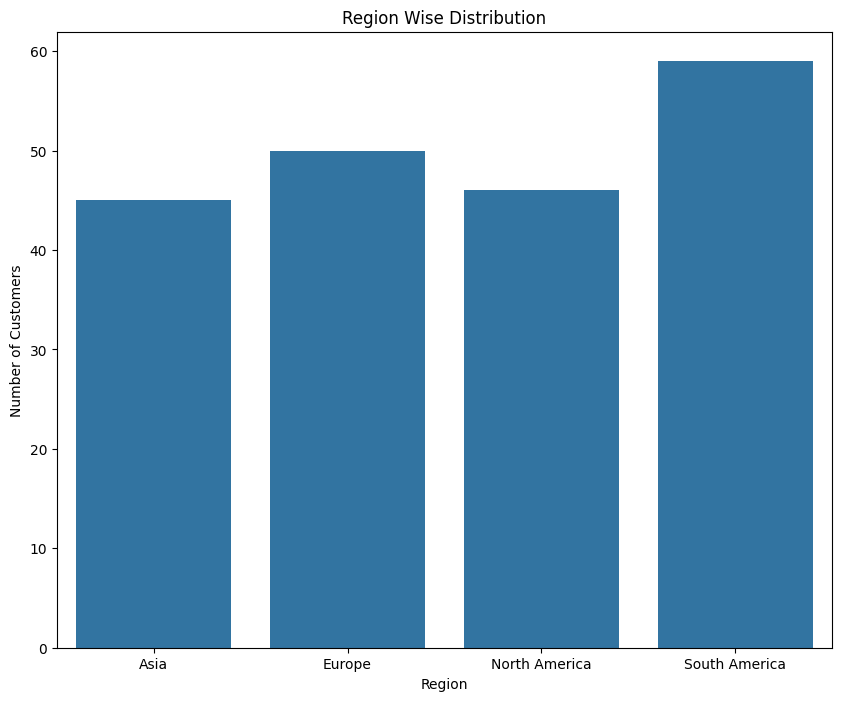

In [87]:
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns
region_data=customer.groupby('Region').count()

plt.figure(figsize=(10,8))
plt.title('Region Wise Distribution')
sns.barplot(x=region_data.index,y=region_data['CustomerID'])
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [49]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [50]:
transaction['Time']=pd.to_datetime(transaction['TransactionDate'])
transaction['Time'].dt.hour

,Time
0,12
1,22
2,7
3,22
4,15
...,...
995,8
996,2
997,13
998,10


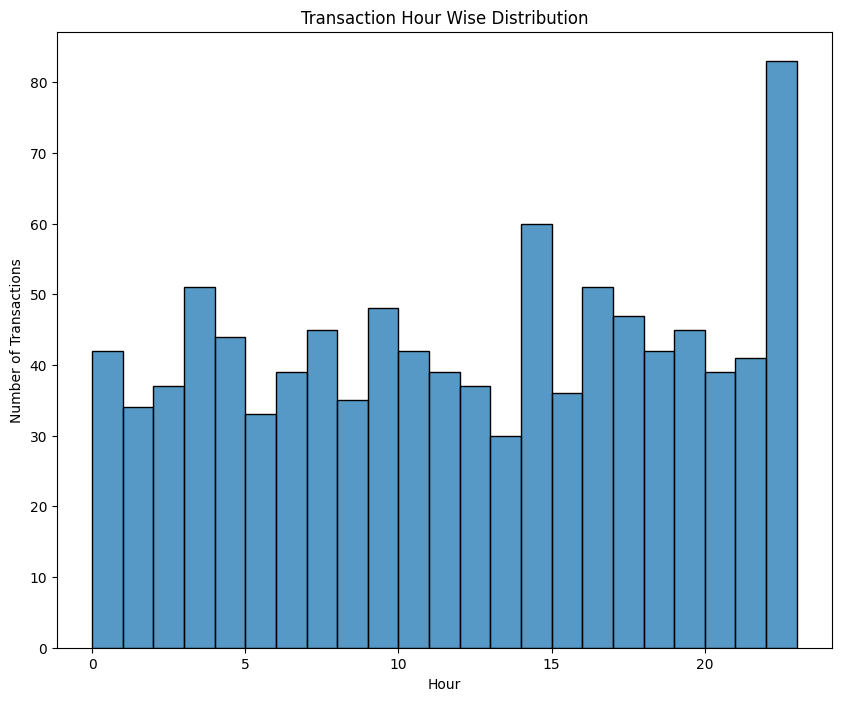

In [65]:
plt.figure(figsize=(10,8))
plt.title('Transaction Hour Wise Distribution')
sns.histplot(transaction['Time'].dt.hour,bins=23)
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

In [66]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [74]:
products_category=products['Category'].value_counts()
print(products_category)

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

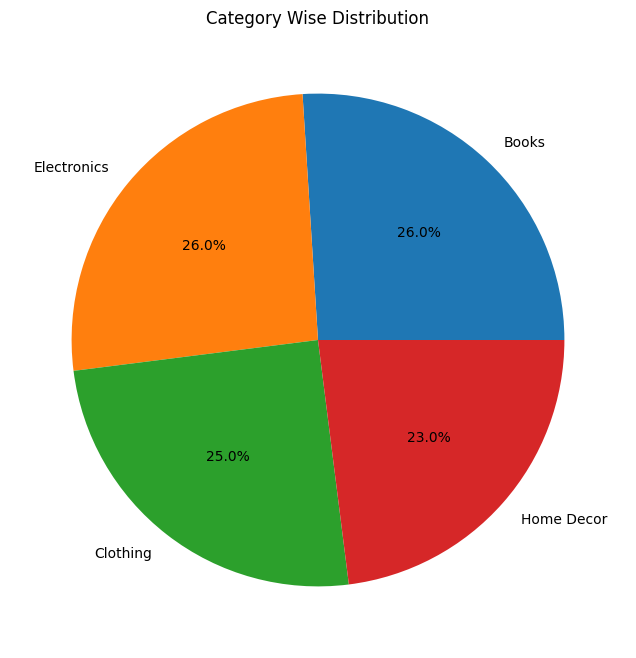

In [79]:
plt.figure(figsize=(10,8))
plt.title('Category Wise Distribution')
plt.pie(products_category,labels=products_category.index,autopct='%1.1f%%')
plt.show

In [96]:
region_data=customer['Region'].value_counts()
print(region_data)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [98]:
customer['Year']=pd.to_datetime(customer['SignupDate']).dt.year
customer['Month']=pd.to_datetime(customer['SignupDate']).dt.month
customer['Day']=pd.to_datetime(customer['SignupDate']).dt.day

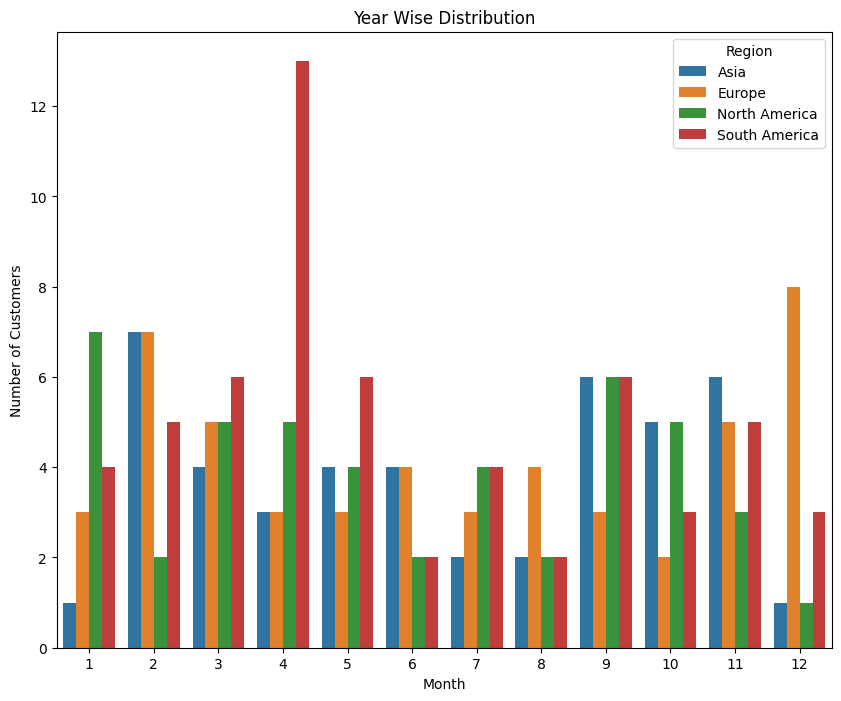

In [108]:
plt.figure(figsize=(10,8))
plt.title('Year Wise Distribution')
year_region_data = customer.groupby(['Month', 'Region'])['CustomerID'].count().reset_index()
sns.barplot(x='Month', y='CustomerID', hue='Region', data=year_region_data)
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()

In [127]:
products_category=products.groupby(['Category','ProductName']).size().reset_index(name='Count')



In [128]:
import plotly.express as px
fig = px.sunburst(products_category, path=['Category','ProductName'], values='Count')
fig.show()